Number of taus vs. iterations for each algorithm

In [3]:
%matplotlib inline
import os
import matplotlib.pyplot as plt
from arguments import get_args
args = get_args()

algos = ["alg0", "alg1", "alg2", "alg3"]

datapath = "coverage_data/"
savepath = "24_2_12_tau_vs_it/"
if not os.path.exists(savepath):
    os.makedirs(savepath)

Namespace(exp_name='nh3', lattice_size=50, sim_round=10000000, num_samples=50, end_time=0.00011, alg1_lambda=0.1, alg2_lambda=0.1, alg3_lambda=0.001, tau_max=1e-08, algo=-1, path='24_1_11/')


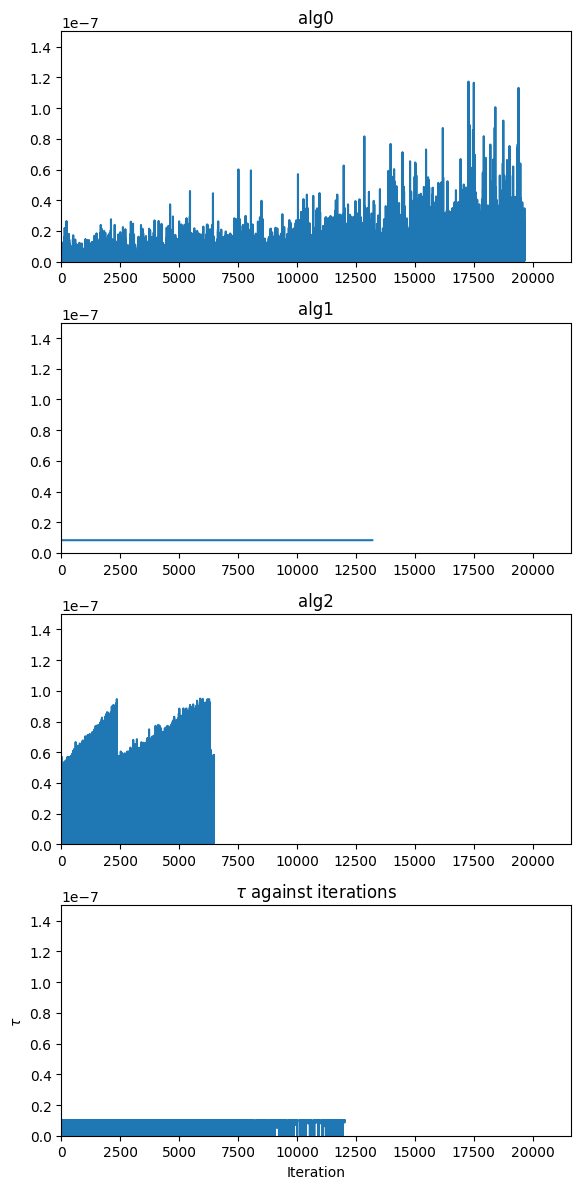

<Figure size 640x480 with 0 Axes>

In [4]:
# create four vertical subplots
fig, axs = plt.subplots(4, 1, figsize=(6, 12))

max_x_length = 0
max_y_length = 0
for specie_idx in range(len(args.sim.species_names)):

    if args.sim._init_state[specie_idx] == 0: # # ignore species that cannot stay on the surface
        continue
    for idx, algo in enumerate(algos):
        file_name = os.path.join(datapath, f"{algo}_size_{args.lattice_size}_sample_{args.num_samples}_{args.sim.species_names[specie_idx]}.txt")
        if not os.path.exists(file_name):
            print(f"{file_name} does not exist, ignored")
            continue
        with open(file_name, 'r') as file:
            lines = file.readlines()

        for i, line in enumerate(lines):
            if "taus in list" in line:
                list_line = lines[i+1]
                break
        try:
            tau_list = eval(list_line)
        except Exception as e:
            print(f"error when evaluating list: {e}")

        axs[idx].plot(tau_list)
        axs[idx].set_title(algos[idx])

        max_x_length = len(tau_list) if max_x_length < len(tau_list) else max_x_length
        max_y_length = max(tau_list) if max_y_length < max(tau_list) else max_y_length
   
    # set x and y axis limits
    [ax.set_xlim([0, max_x_length*1.1]) for ax in axs]
    [ax.set_ylim([0, 1.5e-7]) for ax in axs]

    plt.xlabel("Iteration")
    plt.ylabel("$\\tau$")
    # adjust layout to avoid overlapping
    plt.tight_layout()
    sp_name = args.sim.species_names[specie_idx]
    if sp_name.endswith("_s"):
        sp_name = sp_name[:-2]
    plt.title(f"$\\tau$ against iterations")


    plt.savefig(os.path.join(savepath, "tau_vs_it.png"))
    plt.savefig(os.path.join(savepath, "tau_vs_it.pdf"))
    plt.show()
    plt.clf()

    break